# Introduction
In this notebook, we analyze data from Facebook and learn to apply text mining techniques.

Goal: Identify top 10 most used words overall and for each company.

## Roadmap
1. Data pre-processing
2. Visualization 


In [15]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

sns.set_style('ticks')
%matplotlib inline

pd.set_option('display.max_columns',30)

In [2]:
import os
os.getcwd()

'/Users/kavyaannapareddy/Desktop/Projects/python/wip'

In [3]:
# read data file
file_path = '/Users/kavyaannapareddy/Desktop/Projects/python/wip/Facebook_Posts.xlsx'
facebook= pd.read_excel(file_path, header='infer')
facebook.head()

,company_urlname,company_id,post_id,from>name,message,story,picture,source,name,caption,description,icon,created_time,updated_time,shares,C2B_likes,total_comments,created_date,post_time,post_date,weekday,time,type
0,Acura,85299287409,10150662364867410,Acura,"Driving to work may not be one of them, but a...",,http://platform.ak.fbcdn.net/www/app_full_pro...,,ROAD TRIP USA,www.roadtripusa.com,Road Trip USA and author Jamie Jensen help yo...,http://photos-e.ak.fbcdn.net/photos-ak-snc1/v...,2012-03-12T17:03:51+0000,2012-03-13T15:01:48+0000,0,30,17,2012-03-12,17:03:51,2012-03-12,1,afternoon,link
1,Acura,85299287409,10150660189762410,Acura,Good morning Acura fans! What are you going t...,,http://platform.ak.fbcdn.net/www/app_full_pro...,,Acura.com – Official Home of Acura Cars and S...,www.acura.com,The official home of Acura. Find out informat...,http://photos-e.ak.fbcdn.net/photos-ak-snc1/v...,2012-03-11T17:01:37+0000,2012-03-12T05:21:50+0000,0,55,53,2012-03-11,17:01:37,2012-03-11,7,afternoon,link
2,Acura,85299287409,10150658446187410,Acura,Remember to set your clocks ahead 1 hour toni...,,http://platform.ak.fbcdn.net/www/app_full_pro...,,Acura.com – Official Home of Acura Cars and S...,www.acura.com,The official home of Acura. Find out informat...,http://photos-e.ak.fbcdn.net/photos-ak-snc1/v...,2012-03-10T19:01:28+0000,2012-03-12T04:29:33+0000,0,53,31,2012-03-10,19:01:28,2012-03-10,6,night,link
3,Acura,85299287409,182233025225987,Acura,Excited for the new Acura ILX? Get on our int...,,http://external.ak.fbcdn.net/safe_image.php?d...,,2013 Acura / Future Vehicles - ILX / Acura.com,www.acura.com,The Acura ILX blends technology and design.,http://static.ak.fbcdn.net/rsrc.php/v1/yD/r/a...,2012-03-09T17:16:44+0000,2012-03-12T03:41:00+0000,19,180,60,2012-03-09,17:16:44,2012-03-09,5,afternoon,link
4,Acura,85299287409,114043735386663,Acura,You may remember Tyson Hugie as the Acura own...,,http://profile.ak.fbcdn.net/hprofile-ak-snc4/...,,Acura,,"Over the past two decades, Acura has been in ...",http://static.ak.fbcdn.net/rsrc.php/v1/yD/r/a...,2012-03-09T02:41:37+0000,2012-03-12T16:20:50+0000,2,87,15,2012-03-09,02:41:37,2012-03-09,5,early morning,link


We consider only the message column for now. Identify top ten used words overall and per company.

In [4]:
facebook.keys()

Index(['company_urlname', ' company_id', ' post_id ', ' from>name ',
       ' message ', ' story ', ' picture ', ' source ', ' name ', ' caption ',
       ' description ', ' icon ', ' created_time ', ' updated_time ',
       ' shares', 'C2B_likes', 'total_comments', 'created_date', 'post_time',
       'post_date', 'weekday', 'time', ' type '],
      dtype='object')

In [5]:
message = facebook[[' from>name ',' message ']]
message = message.rename(columns={' from>name ':'company',' message ':'text'})

In [6]:
message.shape

(3275, 2)

In [7]:
message.isnull().sum()

company    0
text       0
dtype: int64

There are no missing values. We first convert each of the sentences to string of words and then identify count of each of the words. we list the top ten words.

While we can write an algorithm to split each of the sentences in the column into words and count the number of words using a counter, we will use nltk package. 

# Data Preprocessing

In [8]:
from nltk import word_tokenize
import string
word_list=[]

for row in message['text']:
    # split into words
    tokens = word_tokenize(row)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    import string
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    ## add more unwated words here
    unwanted_words =['http','nt',]
    words = [w for w in words if not w in stop_words ]
    words= [w for w in words if not w in unwanted_words]
    word_list.append(words)
    
    
# Put in a dataframe
message['words']= word_list




In [9]:
message

,company,text,words
0,Acura,"Driving to work may not be one of them, but a...","[driving, work, may, one, places, love, drive]"
1,Acura,Good morning Acura fans! What are you going t...,"[good, morning, acura, fans, going, extra, hou..."
2,Acura,Remember to set your clocks ahead 1 hour toni...,"[remember, set, clocks, ahead, hour, tonight, ..."
3,Acura,Excited for the new Acura ILX? Get on our int...,"[excited, new, acura, ilx, get, interest, list..."
4,Acura,You may remember Tyson Hugie as the Acura own...,"[may, remember, tyson, hugie, acura, owner, dr..."
...,...,...,...
3270,Volvo Cars US,Have you submitted your questions for tomorro...,"[submitted, questions, tomorrow, live, chat, t..."
3271,Volvo Cars US,In preparation for the 2012 Detroit Auto Show...,"[preparation, detroit, auto, show, naias, post..."
3272,Volvo Cars US,We had a great 2011! With sales up nearly 25%...,"[great, sales, nearly, like, welcome, new, own..."
3273,Volvo Cars US,The North American International Auto Show is...,"[north, american, international, auto, show, n..."


In [10]:
message['company'].value_counts()

 Ford Motor Company          199
 Ferrari                     183
 Toyota USA                  156
 Volkswagen USA              144
 Subaru of America, Inc.     143
 Nissan                      114
 Lexus                       113
 Jeep                        110
 Aston Martin                108
 Acura                       106
 Infiniti                    100
 Buick                        96
 Dodge                        88
 smart USA                    87
 Mercedes-Benz USA            86
 Chevrolet                    84
 GMC                          84
 Ram                          81
 Mazda                        75
 Jaguar USA                   75
 Chrysler                     72
 Volvo Cars US                70
 Cadillac                     69
 BMW USA                      69
 Mitsubishi                   62
 Bentley Motors               62
 Scion                        61
 Lotus Cars                   60
 Hyundai                      59
 Kia Motors America           55
 MINI USA 

In [11]:
message['company'].nunique()

44

There are 44 companies whose facebook posts message we will analyze to see the top 10 used words overall and for each company.

In [12]:
words_total=[]
for row in message['words']:
    words_total.append(row)
    

In [13]:
import itertools
flat_words =itertools.chain.from_iterable(words_total)

In [17]:
# Calculate frequency distribution
fdist = nltk.FreqDist(flat_words)
fdist_10 = fdist.most_common(10)

# Visualization

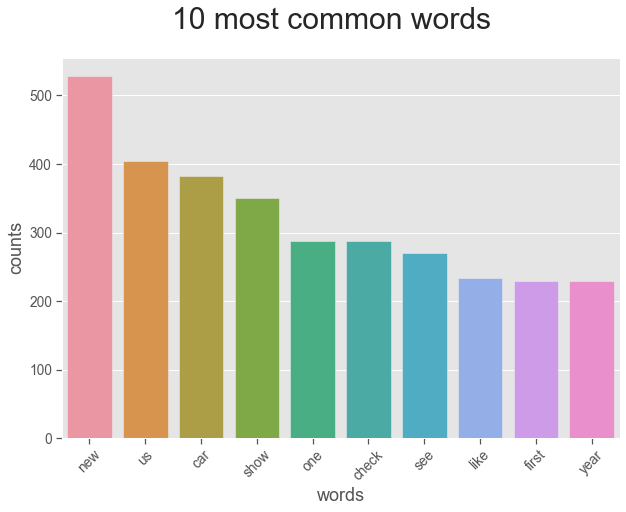

In [91]:
plt.style.use('ggplot')
labels, values = zip(*fdist_10)
fig = plt.figure(figsize=(10,7))  
ax= fig.add_subplot()
l= np.arange(len(labels))
sns.barplot(l, values)
plt.xticks(l, labels, rotation=45) 
plt.xlabel('words', fontsize=18)
plt.ylabel('counts', fontsize= 18)
plt.suptitle('10 most common words', fontsize=30)
plt.show()

Let's do it for each company

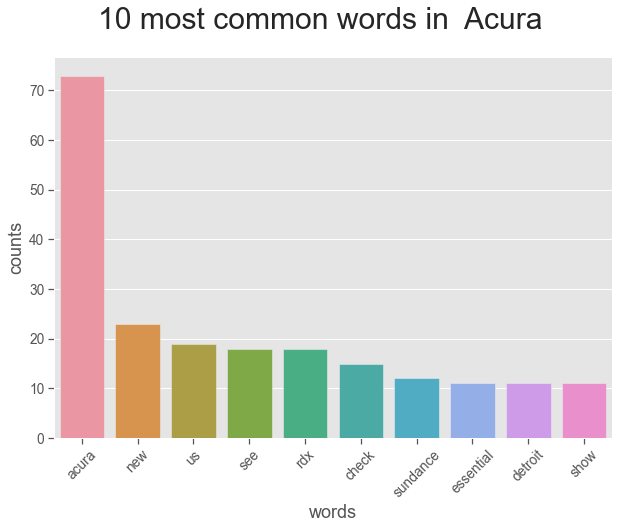

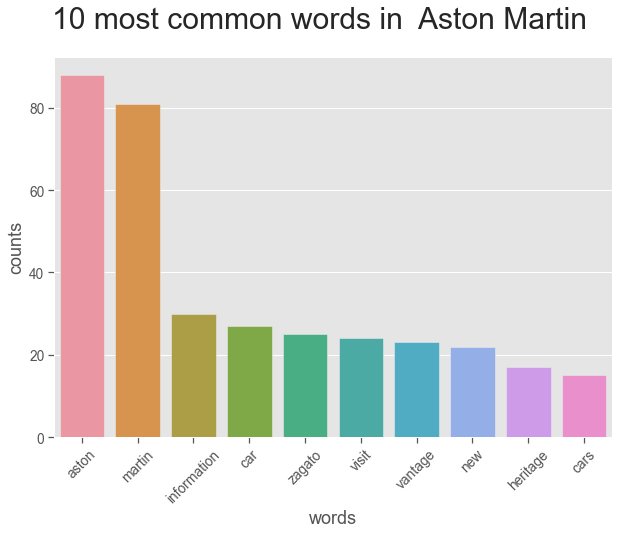

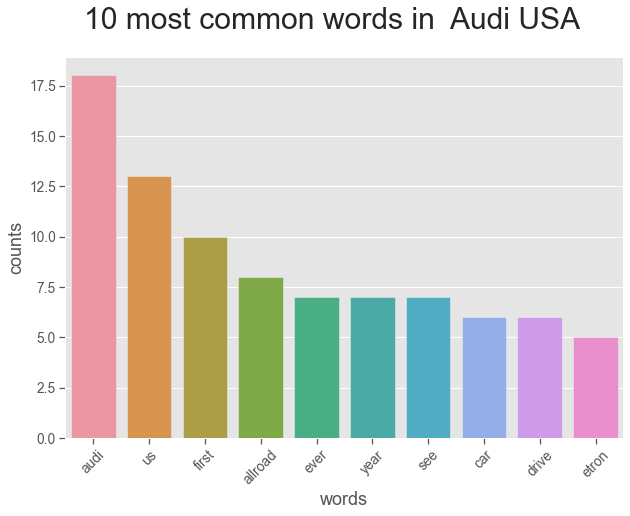

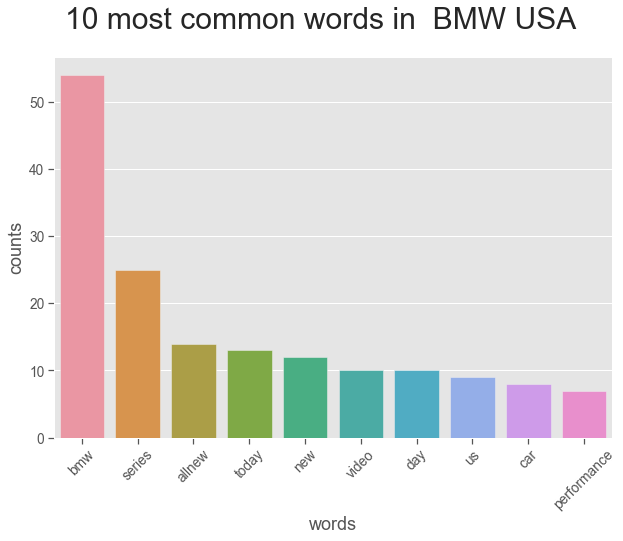

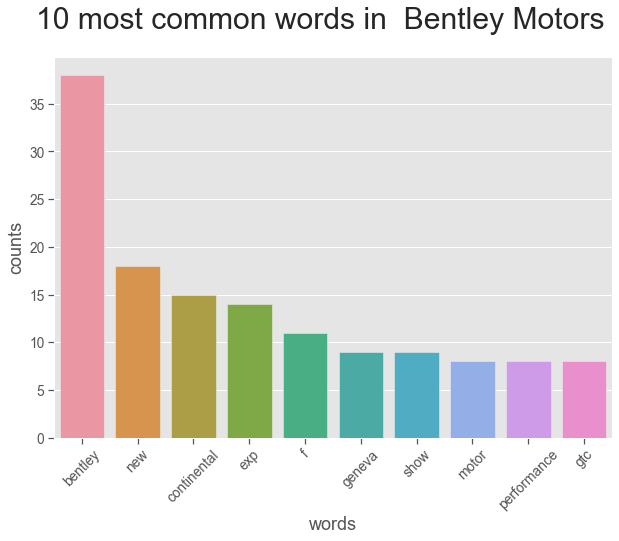

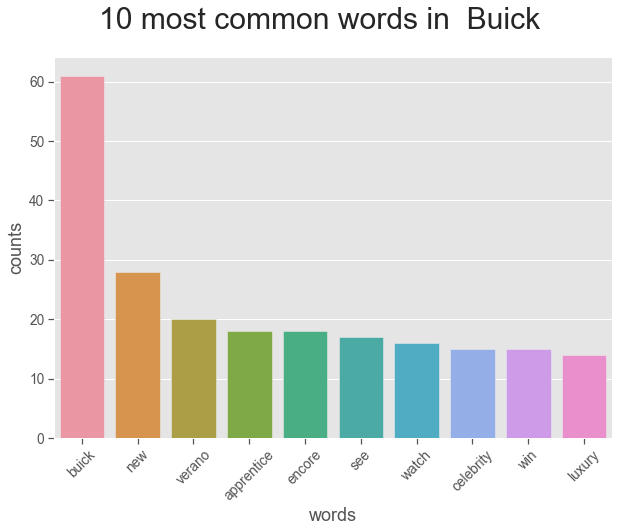

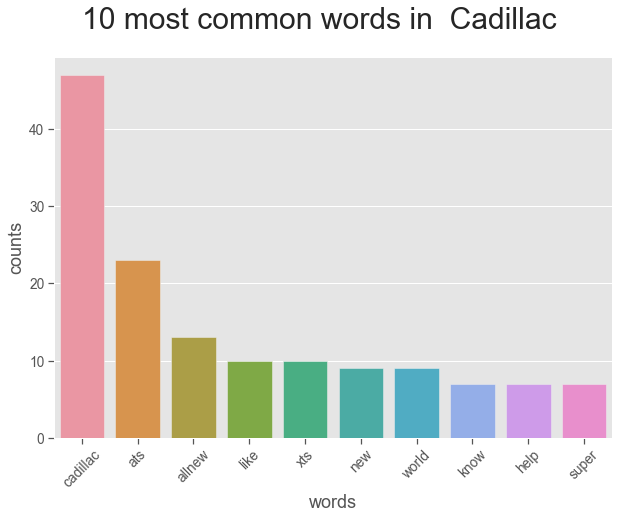

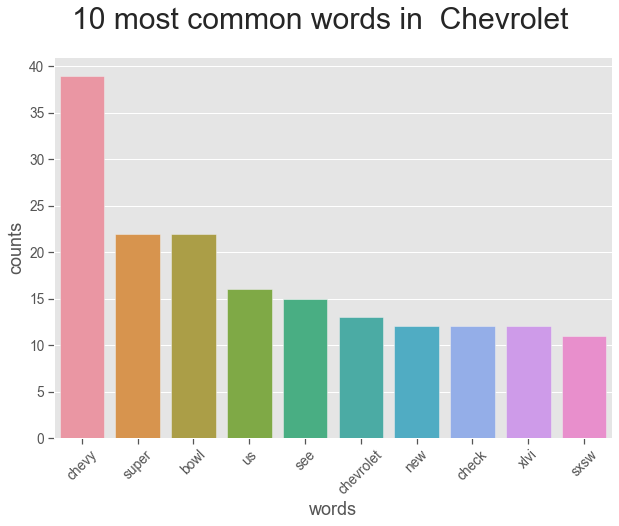

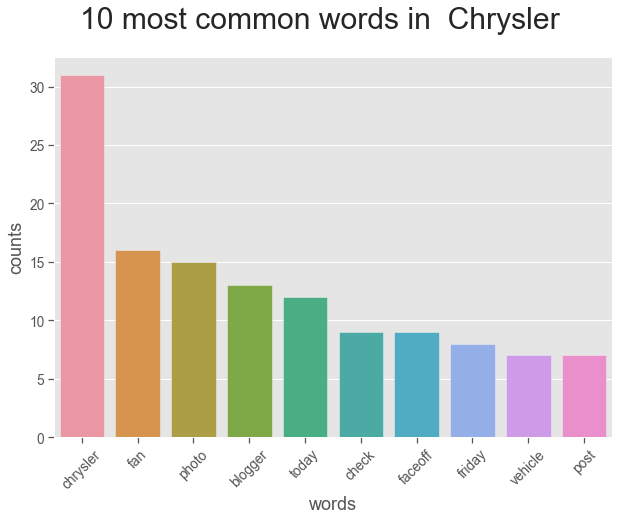

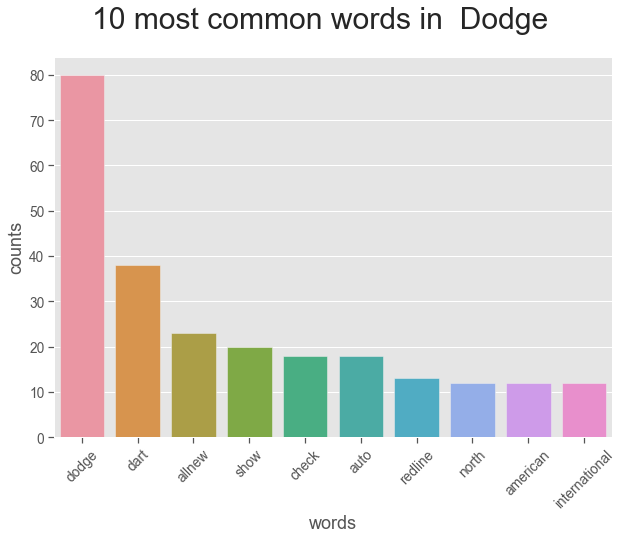

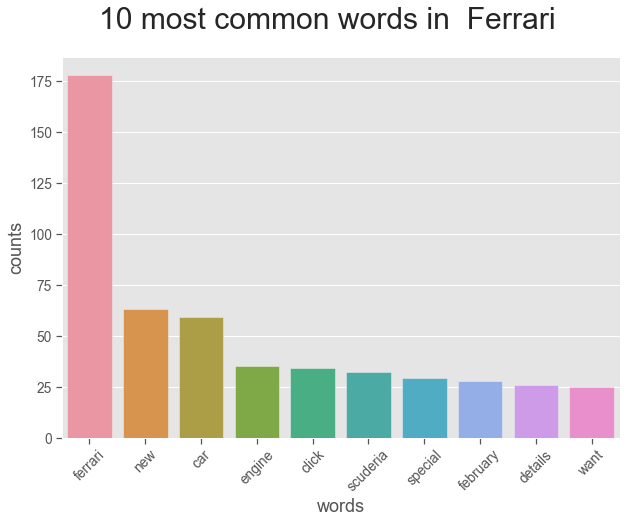

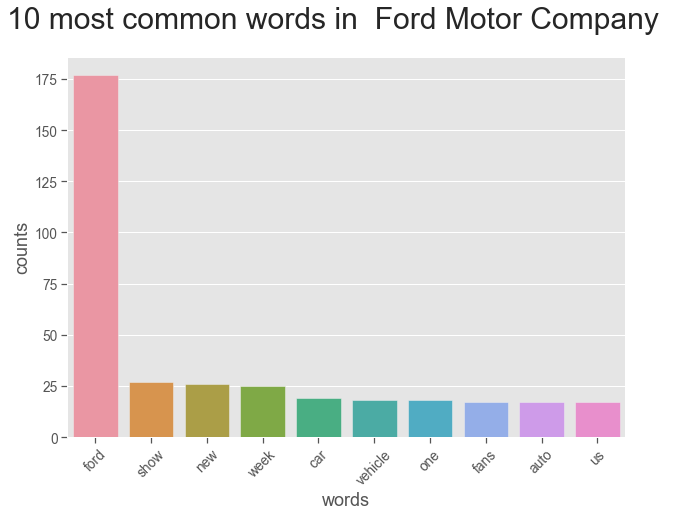

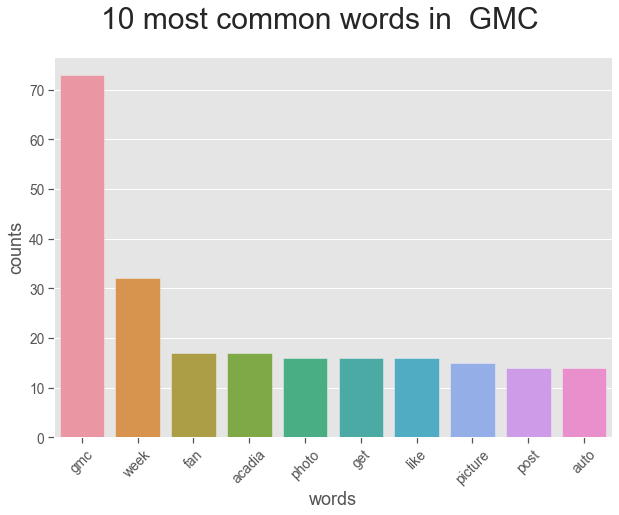

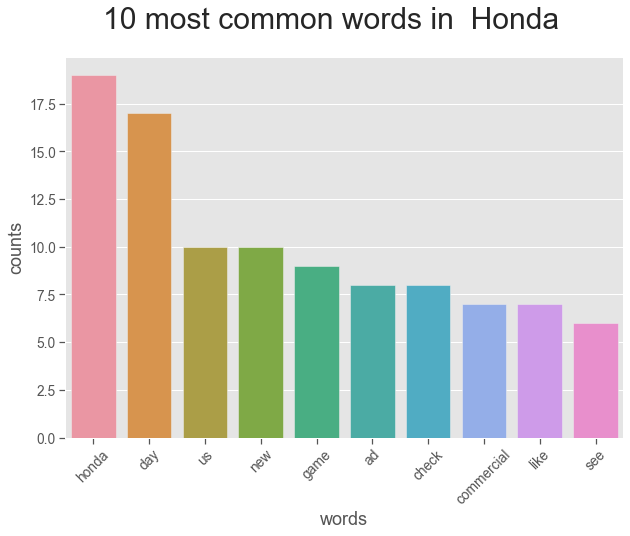

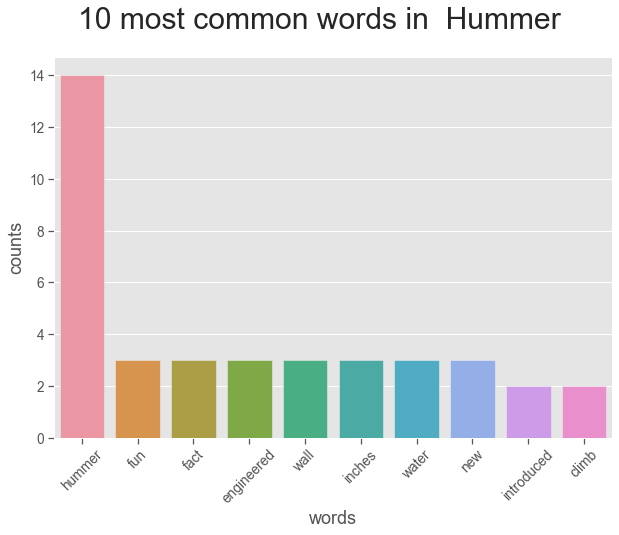

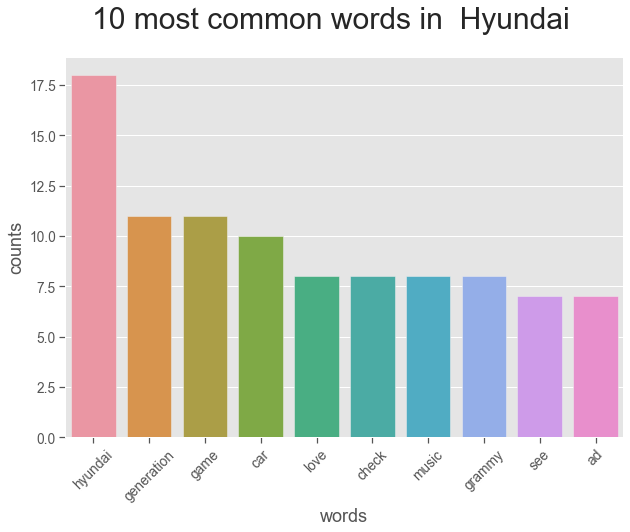

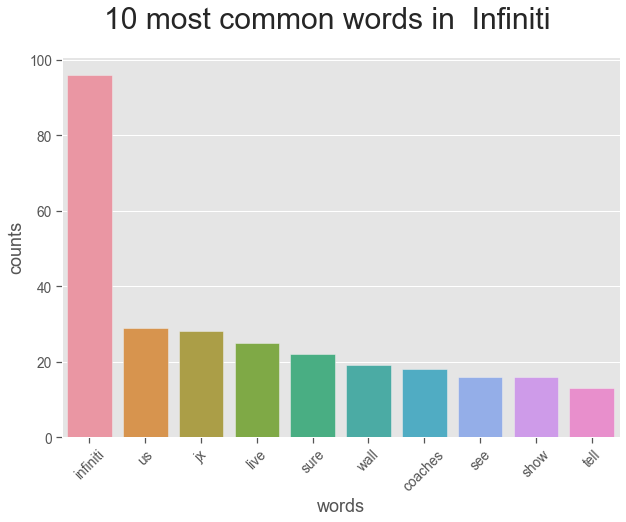

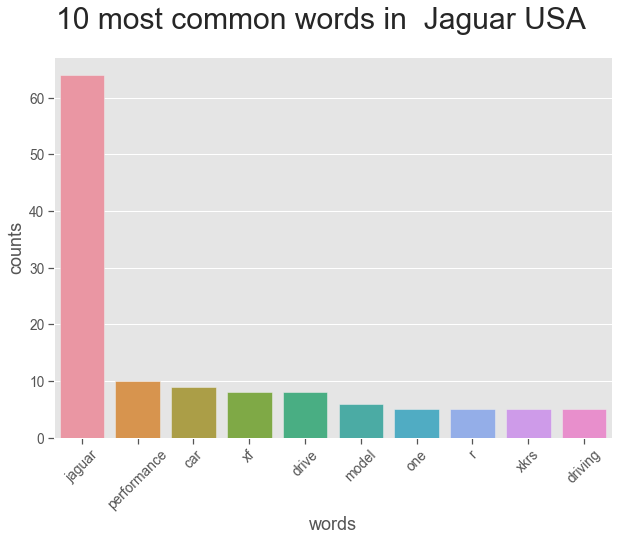

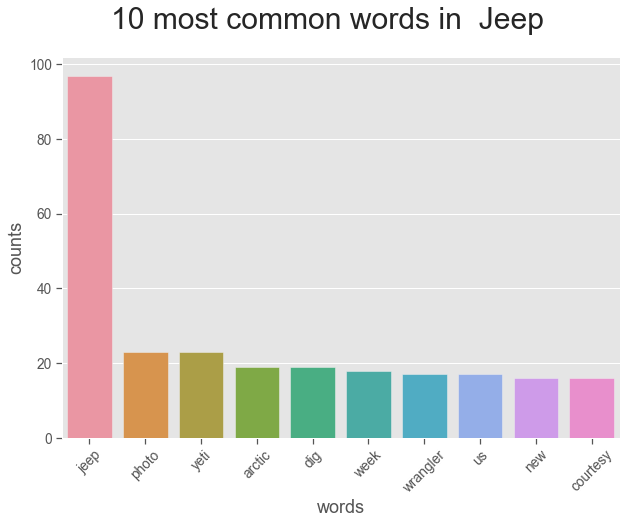

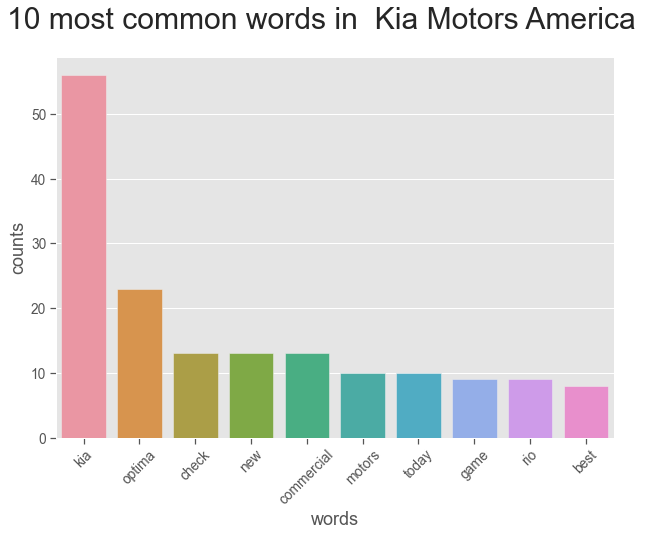

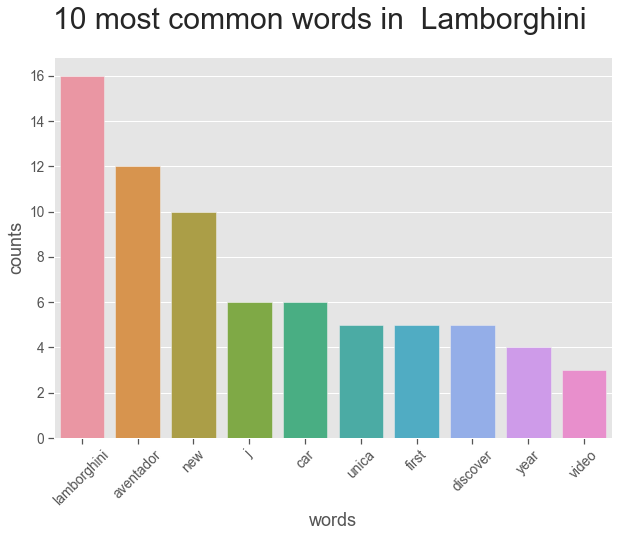

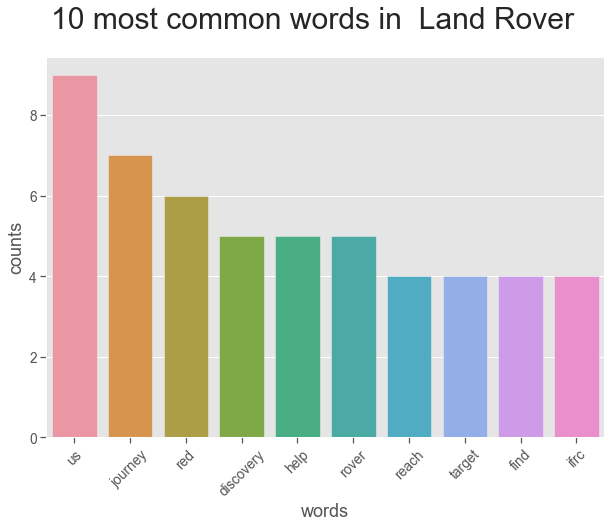

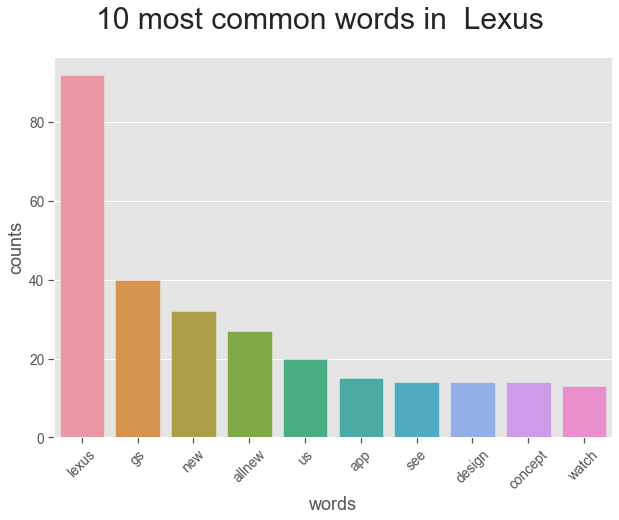

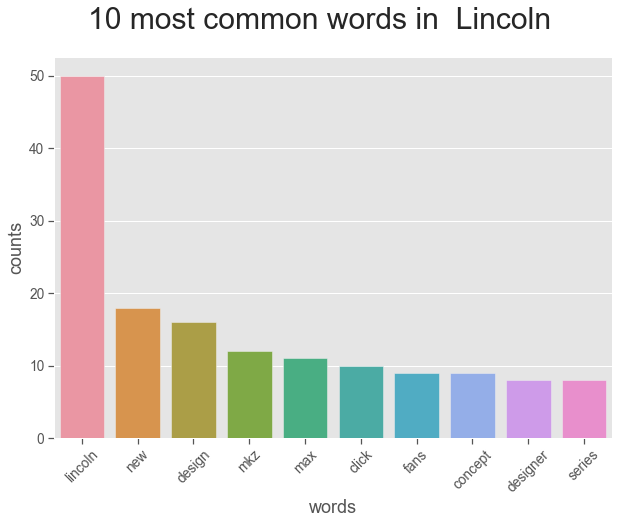

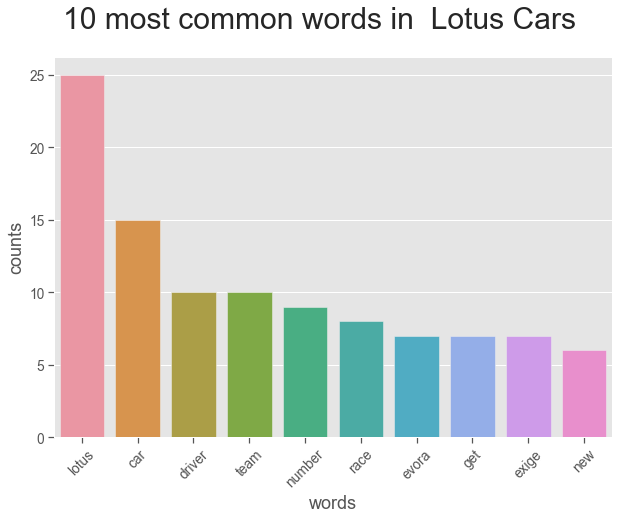

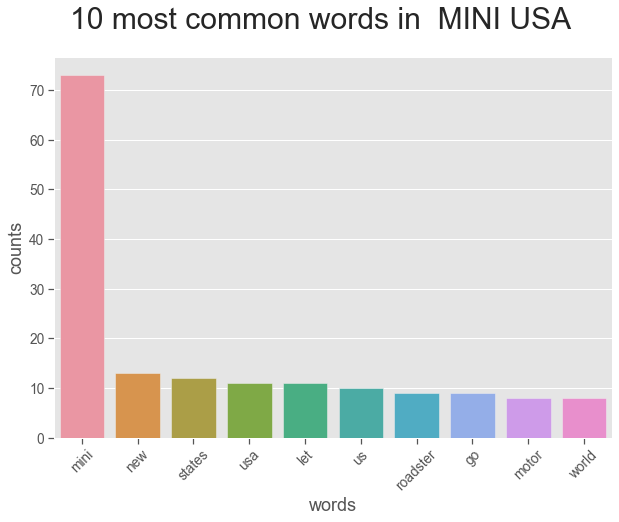

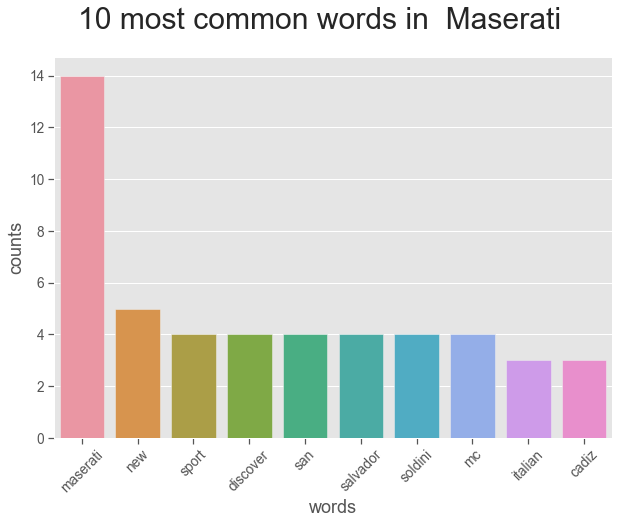

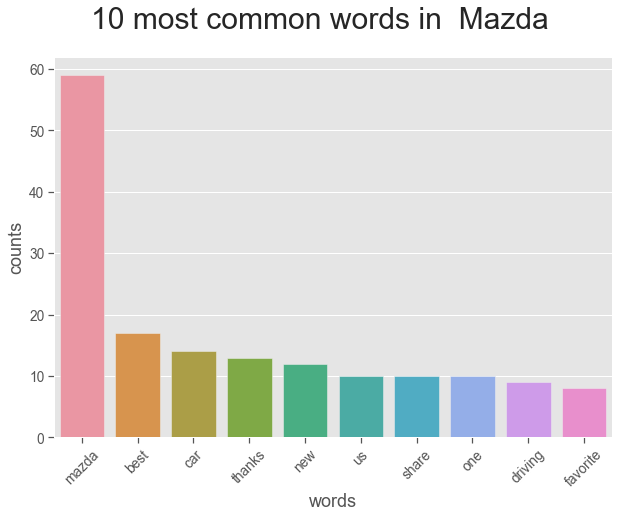

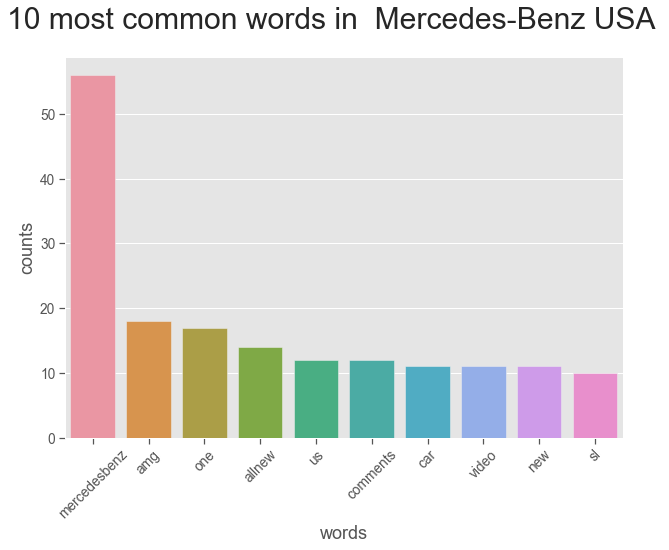

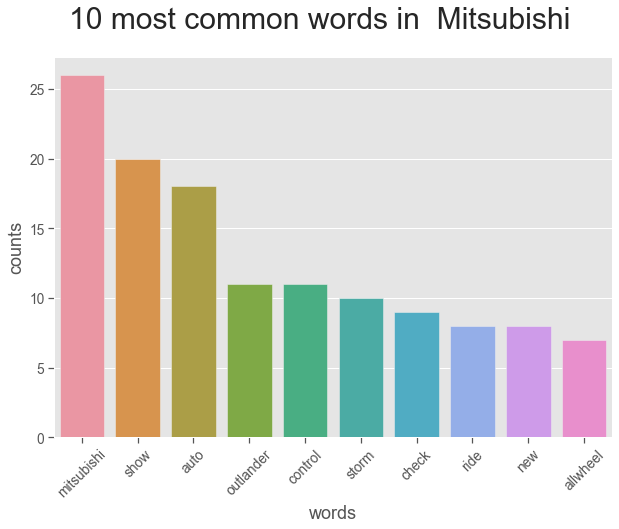

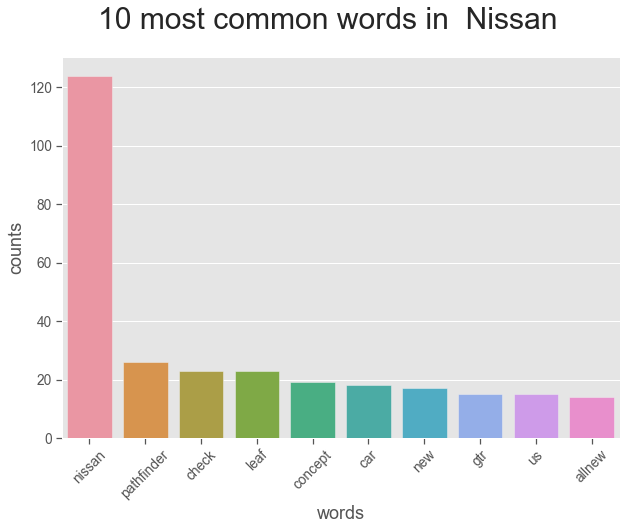

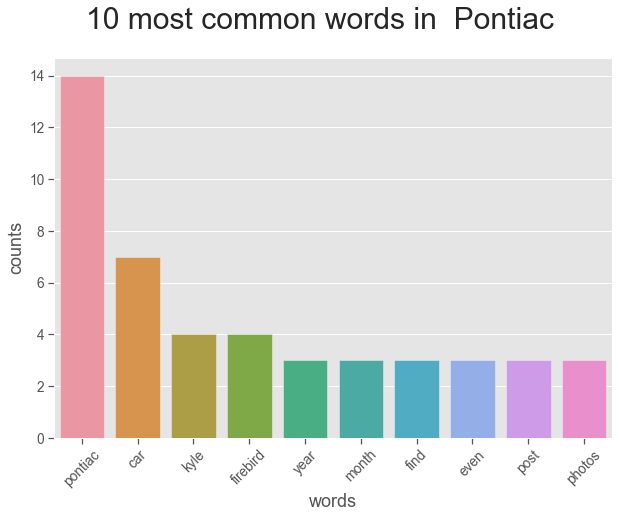

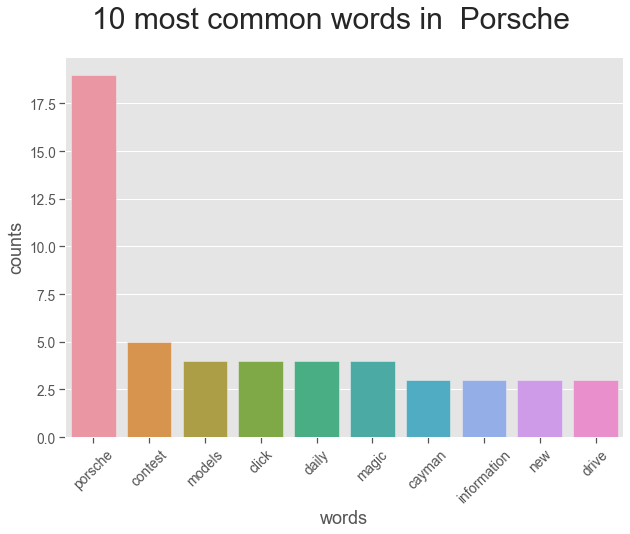

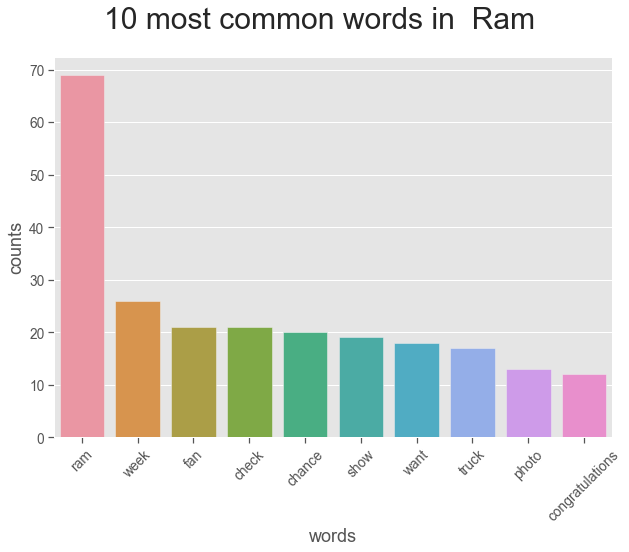

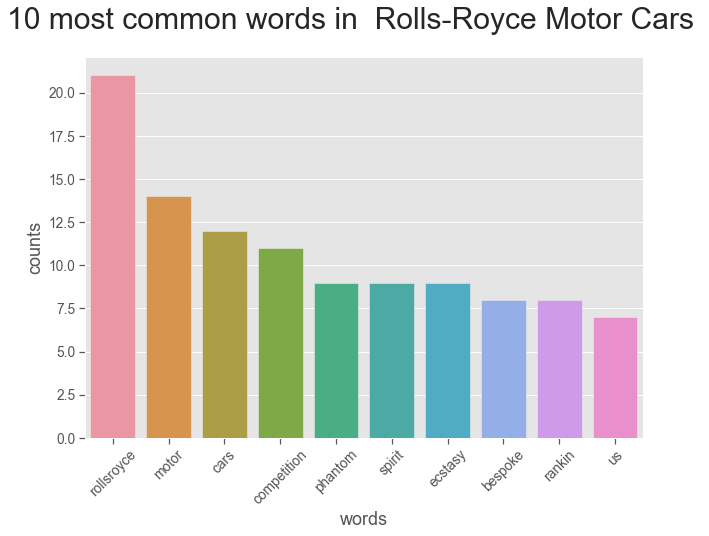

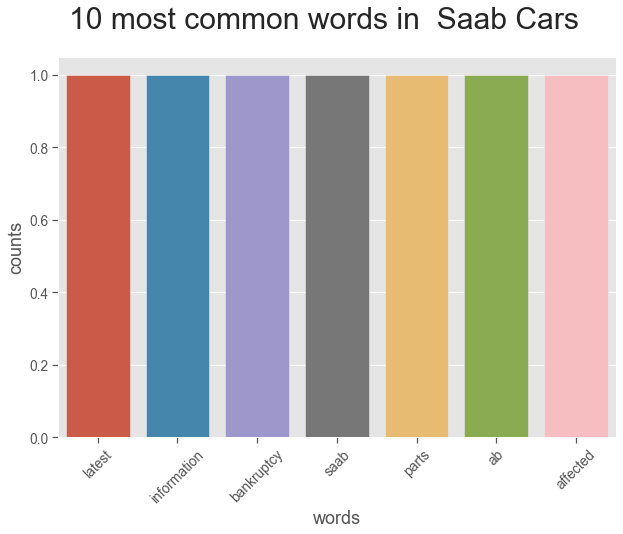

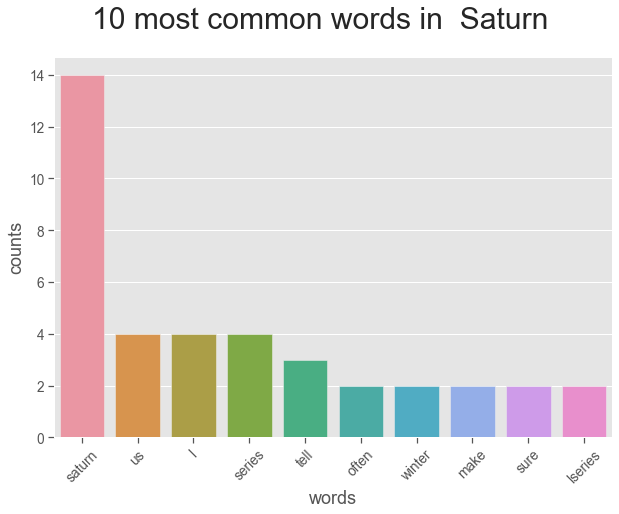

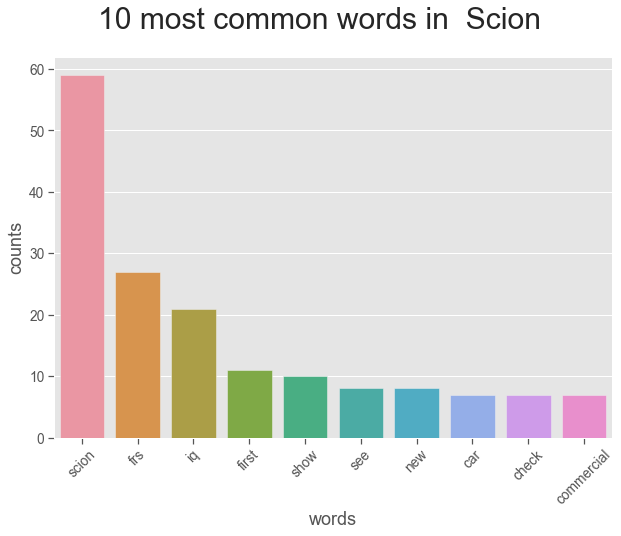

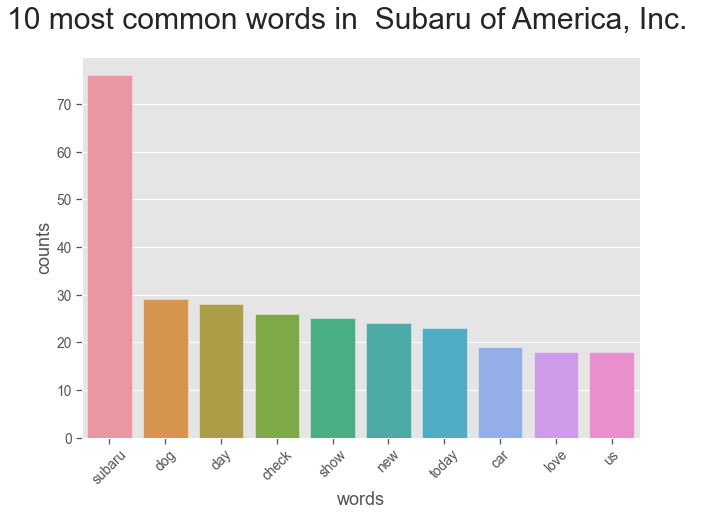

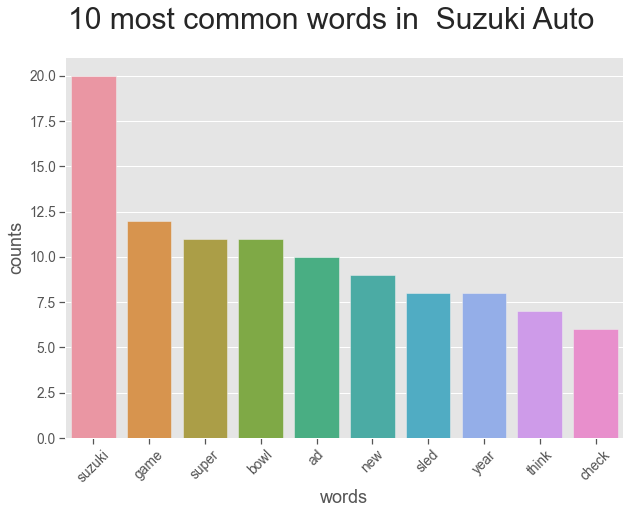

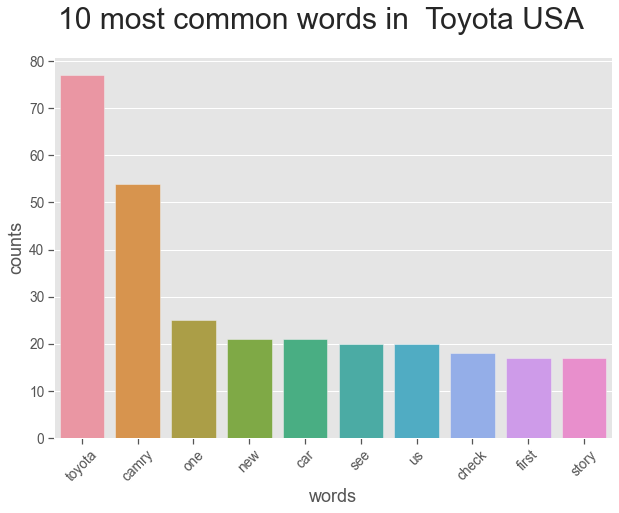

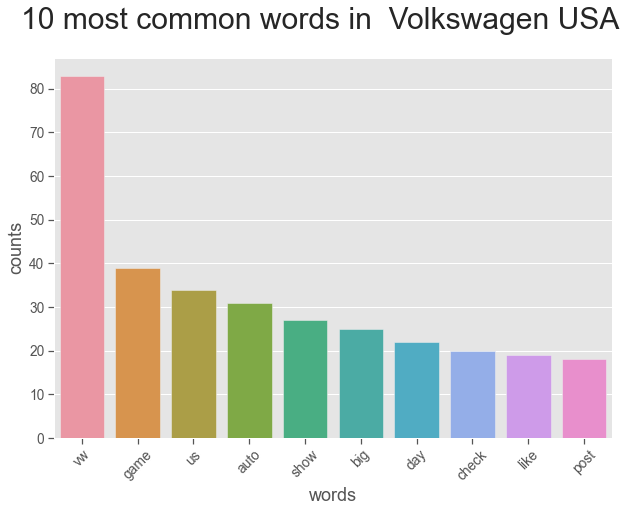

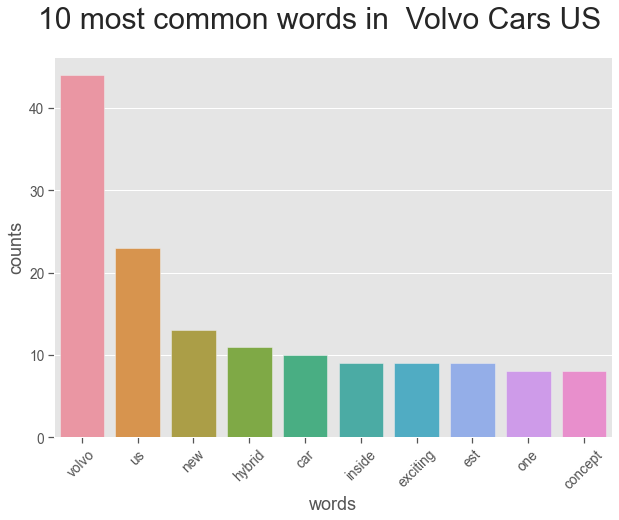

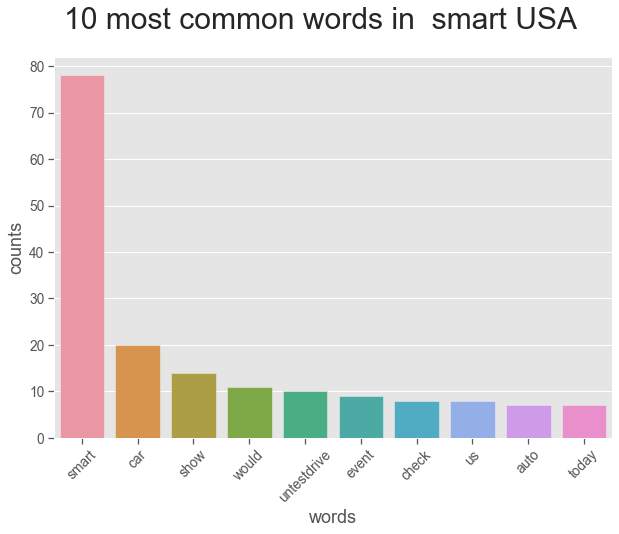

In [108]:
for name, group in message.groupby(['company']):
    words_total=[]
    for row in group['words']:
        words_total.append(row)
    
    flat_words =itertools.chain.from_iterable(words_total)
    # Calculate frequency distribution
    fdist = nltk.FreqDist(flat_words)
    fdist_10 = fdist.most_common(10)
    plt.style.use('ggplot')
    labels, values = zip(*fdist_10)
    fig = plt.figure(figsize=(10,7))  
    ax= fig.add_subplot()
    l= np.arange(len(labels))
    sns.barplot(l, values)
    plt.xticks(l, labels, rotation=45) 
    plt.xlabel('words', fontsize=18)
    plt.ylabel('counts', fontsize= 18)
    plt.suptitle('10 most common words in %s'%(name), fontsize=30)
    plt.show()
    

# Conclusion
We have plotted top 10 most used words on Facebook Posts overall and for each company.